# TP5 : inférence Bayésienne 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

#### Inférence Bayésienne

On souhaite tracer la courbe

$$
 p(u|n_N,N) = \frac{p(n_N|u,N) p(u)}{p(n_N|N)}
$$

vu en cours. On considérera donc les 11 boîtes, chacune contenant 10 boules. Pour cela on codera les fonctions

1. implémentation de la fonction $p(n_N|u,N)$ : la probabilité de tirer $n_N$ boules noires sachant que l'on effectue $N$ tirages et que la boite contient une proportion $u$ de boules noires
2. implémentation de la fonction $p(n_N|N)$ : "evidence", $= \sum_u p(n_N|u,N) p(u)$, probabilité du jeu de données sachant notre modélisation
3. implémentation de la fonction $p(u|n_N,N)$ : probabilité que les tirages ont été effectué par la boîte contenant une proportion $u$ de boules noires sachant que l'on a tiré $n_N$ boules noires en faisant$N$ tirages

Rappel : $p(n_N|u,N) = \frac{N!}{n_N! (N-n_N)!} (u/10)^{n_N} (1-u/10)^{N-n_n}$

In [30]:
Nu = 11
NB = 10

In [32]:
def proba_Nn_u(nN,u,N):
    C = scipy.special.binom(N, nN)
    pr = (u/NB)**nN*(1-u/NB)**(N-nN)
    return C*pr

# test
cum=0
for i in range(20):
    cum += proba_Nn_u(i,2,20)
    print("Proba nN=",i," = ",proba_Nn_u(i,2,20))
    
print(cum)    

Proba nN= 0  =  0.011529215046068483
Proba nN= 1  =  0.05764607523034242
Proba nN= 2  =  0.13690942867206327
Proba nN= 3  =  0.20536414300809488
Proba nN= 4  =  0.21819940194610074
Proba nN= 5  =  0.17455952155688062
Proba nN= 6  =  0.10909970097305038
Proba nN= 7  =  0.054549850486525185
Proba nN= 8  =  0.022160876760150862
Proba nN= 9  =  0.007386958920050286
Proba nN= 10  =  0.0020314137030138287
Proba nN= 11  =  0.00046168493250314287
Proba nN= 12  =  8.65659248443393e-05
Proba nN= 13  =  1.3317834591436813e-05
Proba nN= 14  =  1.6647293239296018e-06
Proba nN= 15  =  1.6647293239296019e-07
Proba nN= 16  =  1.3005697843200012e-08
Proba nN= 17  =  7.65041049600001e-10
Proba nN= 18  =  3.1876710400000044e-11
Proba nN= 19  =  8.38860800000001e-13
0.9999999999999907


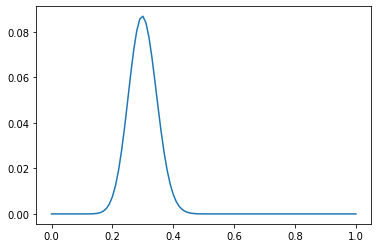

In [4]:
# exemple
NTir = 100
U = 3
pr = np.zeros(NTir+1)
for i in range(NTir+1):
    pr[i] = proba_Nn_u(i,U,NTir)
    
xr = np.arange(0,1.00001,1/NTir)
plt.plot(xr,pr)

In [5]:
def proba_Nn(nN,N):
    sum = 0
    for u in range(Nu):
        sum += proba_Nn_u(nN,u,N)
    return sum/Nu

In [6]:
def CalcPu(Nn,N):
    Pu = np.zeros(Nu)
    for u in range(Nu):
        Pu[u] = proba_Nn_u(Nn,u,N)/proba_Nn(Nn,N)/Nu
    return Pu

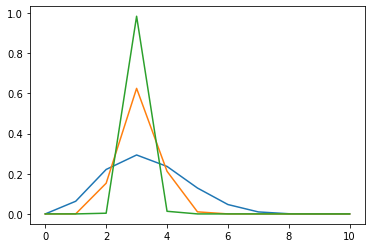

In [7]:
# Calcul de P(u|...)

#Nb de boules noires
NNoires = 3
#Nb de tirages
NTirages = 10

Pu = CalcPu(NNoires,NTirages)
Pu10 = CalcPu(NNoires*5,NTirages*5)
Pu100 = CalcPu(NNoires*20,NTirages*20)
    
plt.plot(Pu)
plt.plot(Pu10)
plt.plot(Pu100)

### Utilisation de la distribution "à priori"

Implémenter à la main une distribution à priori $p(u)$.
Pour cela, prendre par exemple $u^* = 6$, on utilisera donc 


  * $p(u^*) = 0.3$
  * $p(u^* \pm 1) = 0.15$
  * $p(u) = 0.05$ sinon

Maintenant 

  1. tracer la fonction $p(u)$
  2. Modifier la fonction CaclPu pour tenir compte de cette distribution à priori.
  3. Tracer $p(u|n_N,N)$ avec $N$ prenant les valeurs $10$, $20$, $40$, $80$, $160$ et $N_{\rm noires} = 3,6,12,24,48$.

1.0


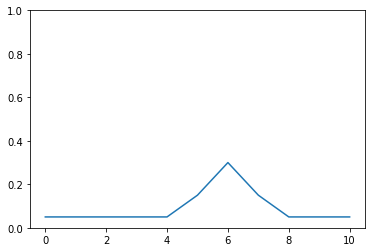

In [33]:
def prior_p(us=6):
    Prior_u = np.zeros(Nu)
    for u in range(Nu):
        Prior_u[u] = 0.05
    Prior_u[us] = 0.3
    Prior_u[us+1] = 0.15
    Prior_u[us-1] = 0.15
    return Prior_u

pr_u = prior_p()
print(np.sum(pr_u))
plt.ylim(0,1)
plt.plot(pr_u)

In [23]:
def proba_Nn_2(nN,N,prior_u):
    sum = 0
    for u in range(Nu):
        sum += proba_Nn_u(nN,u,N)*prior_u[u]
    return sum

In [24]:
def CalcPu_2(Nn,N,prior_u):
    Pu = np.zeros(Nu)
    for u in range(Nu):
        Pu[u] = proba_Nn_u(Nn,u,N)*prior_u[u]/proba_Nn_2(Nn,N,prior_u)
    return Pu

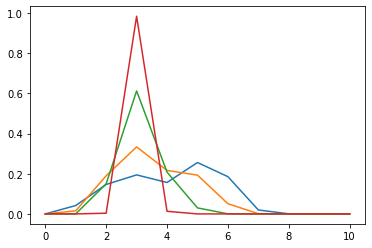

In [34]:
# Calcul de P(u|...)

#Nb de boules noires
NNoires = 3
#Nb de tirages
NTirages = 10

Pu = CalcPu_2(NNoires,NTirages,pr_u)
Pu2 = CalcPu_2(NNoires*2,NTirages*2,pr_u)
Pu10 = CalcPu_2(NNoires*5,NTirages*5,pr_u)
Pu100 = CalcPu_2(NNoires*20,NTirages*20,pr_u)
    
plt.plot(Pu)
plt.plot(Pu2)
plt.plot(Pu10)
plt.plot(Pu100)